In [62]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_columns = 5000
pd.options.display.max_rows = 5000

In [2]:
yillik_ilcesel_su_tuketim = pd.read_excel("ilce-baznda-su-tuketim-miktar-2015-2023.xlsx")

In [9]:
yillik_ilcesel_su_tuketim.head()

,İlçe,2023 (Tüketim-m3),2022 (Tüketim-m3),2021 (Tüketim-m3),2020(Tüketim-m3),2019 (Tüketim-m3),2018 (Tüketim-m3),2017(Tüketim-m3),2016 (Tüketim-m3),2015 (Tüketim-m3)
0,ADALAR,216471,1543403,1435991,1513070,1371291,1399182,1366581,1472276,1432494
1,ARNAVUTKÖY,4400401,18891299,17102127,15570466,13818204,11404878,10176132,9178953,8002123
2,ATAŞEHİR,5907635,24377611,24281319,23737630,22428468,21496185,21205911,19974097,18597049
3,AVCILAR,5194780,21556002,20690506,20824893,19485453,18312736,17558403,17052253,16220476
4,B.ÇEKMECE,3617226,17412198,16167480,16015731,13606571,12222470,11172787,10788924,9915435


In [68]:
ilcesel_su_data = pd.DataFrame(data=[], columns=["ilce","tuketim_m3","yil"])
ilcesel_su_data_temp = pd.DataFrame(data=[], columns=["ilce","tuketim_m3","yil"])

ilcesel_su_data["ilce"] = yillik_ilcesel_su_tuketim["İlçe"].values
ilcesel_su_data["tuketim_m3"] = yillik_ilcesel_su_tuketim["2022 (Tüketim-m3)"].values
ilcesel_su_data["yil"] = 2022

for col in ["2021 (Tüketim-m3)","2020(Tüketim-m3)","2019 (Tüketim-m3)","2018 (Tüketim-m3)","2017(Tüketim-m3)","2016 (Tüketim-m3)","2015 (Tüketim-m3)"]:

    ilcesel_su_data_temp["ilce"] = yillik_ilcesel_su_tuketim["İlçe"].values
    ilcesel_su_data_temp["tuketim_m3"] = yillik_ilcesel_su_tuketim[col].values
    ilcesel_su_data_temp["yil"] = int(col[0:4])

    ilcesel_su_data = pd.concat([ilcesel_su_data,ilcesel_su_data_temp], axis=0)

ilcesel_su_data.reset_index(inplace=True, drop=True)

In [69]:
ilcesel_su_data.tail()

,ilce,tuketim_m3,yil
307,ÇEKMEKÖY,8951936,2015
308,ÜMRANİYE,28085173,2015
309,ÜSKÜDAR,25142059,2015
310,ŞİLE,1835302,2015
311,ŞİŞLİ,15717630,2015


In [70]:
ilcesel_su_data.loc[ilcesel_su_data["ilce"] == "ADALAR","tuketim_m3"].values

array([1543403, 1435991, 1513070, 1371291, 1399182, 1366581, 1472276,
       1432494])

In [88]:
ilcesel_su_data.ilce.unique()

array(['ADALAR', 'ARNAVUTKÖY', 'ATAŞEHİR ', 'AVCILAR', 'B.ÇEKMECE',
       'BAHÇELİEVLER', 'BAKIRKÖY', 'BAYRAMPAŞA', 'BAĞCILAR', 'BAŞAKŞEHİR',
       'BEYKOZ', 'BEYLİKDÜZÜ', 'BEYOĞLU', 'BEŞİKTAŞ', 'ESENLER',
       'ESENYURT', 'EYÜPSULTAN', 'FATİH', 'GOP', 'GÜNGÖREN', 'K.ÇEKMECE',
       'KADIKÖY', 'KARTAL', 'KAĞITHANE', 'MALTEPE', 'PENDİK',
       'SANCAKTEPE', 'SARIYER', 'SULTANBEYLİ', 'SALTANGAZİ', 'SİLİVRİ',
       'TUZLA', 'ZEYTİNBURNU', 'ÇATALCA', 'ÇEKMEKÖY', 'ÜMRANİYE',
       'ÜSKÜDAR', 'ŞİLE', 'ŞİŞLİ'], dtype=object)

In [92]:
anadolu = ["ADALAR","ATAŞEHİR","BEYKOZ","KADIKÖY","KARTAL","MALTEPE","PENDİK","SANCAKTEPE","SULTANBEYLİ","TUZLA","ÇEKMEKÖY","ÜMRANİYE","ÜSKÜDAR","ŞİLE"]
avrupa1 = ["ARNAVUTKÖY","AVCILAR","B.ÇEKMECE","BAHÇELİEVLER","BAKIRKÖY","BAĞCILAR","BAYRAMPAŞA","BAŞAKŞEHİR","BEYLİKDÜZÜ","BEYOĞLU","BEŞİKTAŞ","ESENLER","ESENYURT","EYÜPSULTAN","FATİH",
          "GOP","GÜNGÖREN","K.ÇEKMECE","KAĞITHANE","SARIYER","SULTANGAZİ","SİLİVRİ","ZEYTİNBURNU","ÇATALCA","ŞİŞLİ"]

avrupa2 = ["ARNAVUTKÖY","AVCILAR","BAKIRKÖY","BAYRAMPAŞA","BEYOĞLU","BEŞİKTAŞ","EYÜPSULTAN","FATİH","GOP","KAĞITHANE","SARIYER","ZEYTİNBURNU","ŞİŞLİ"]
avrupa1 = [col for col in avrupa1 if col not in avrupa2]

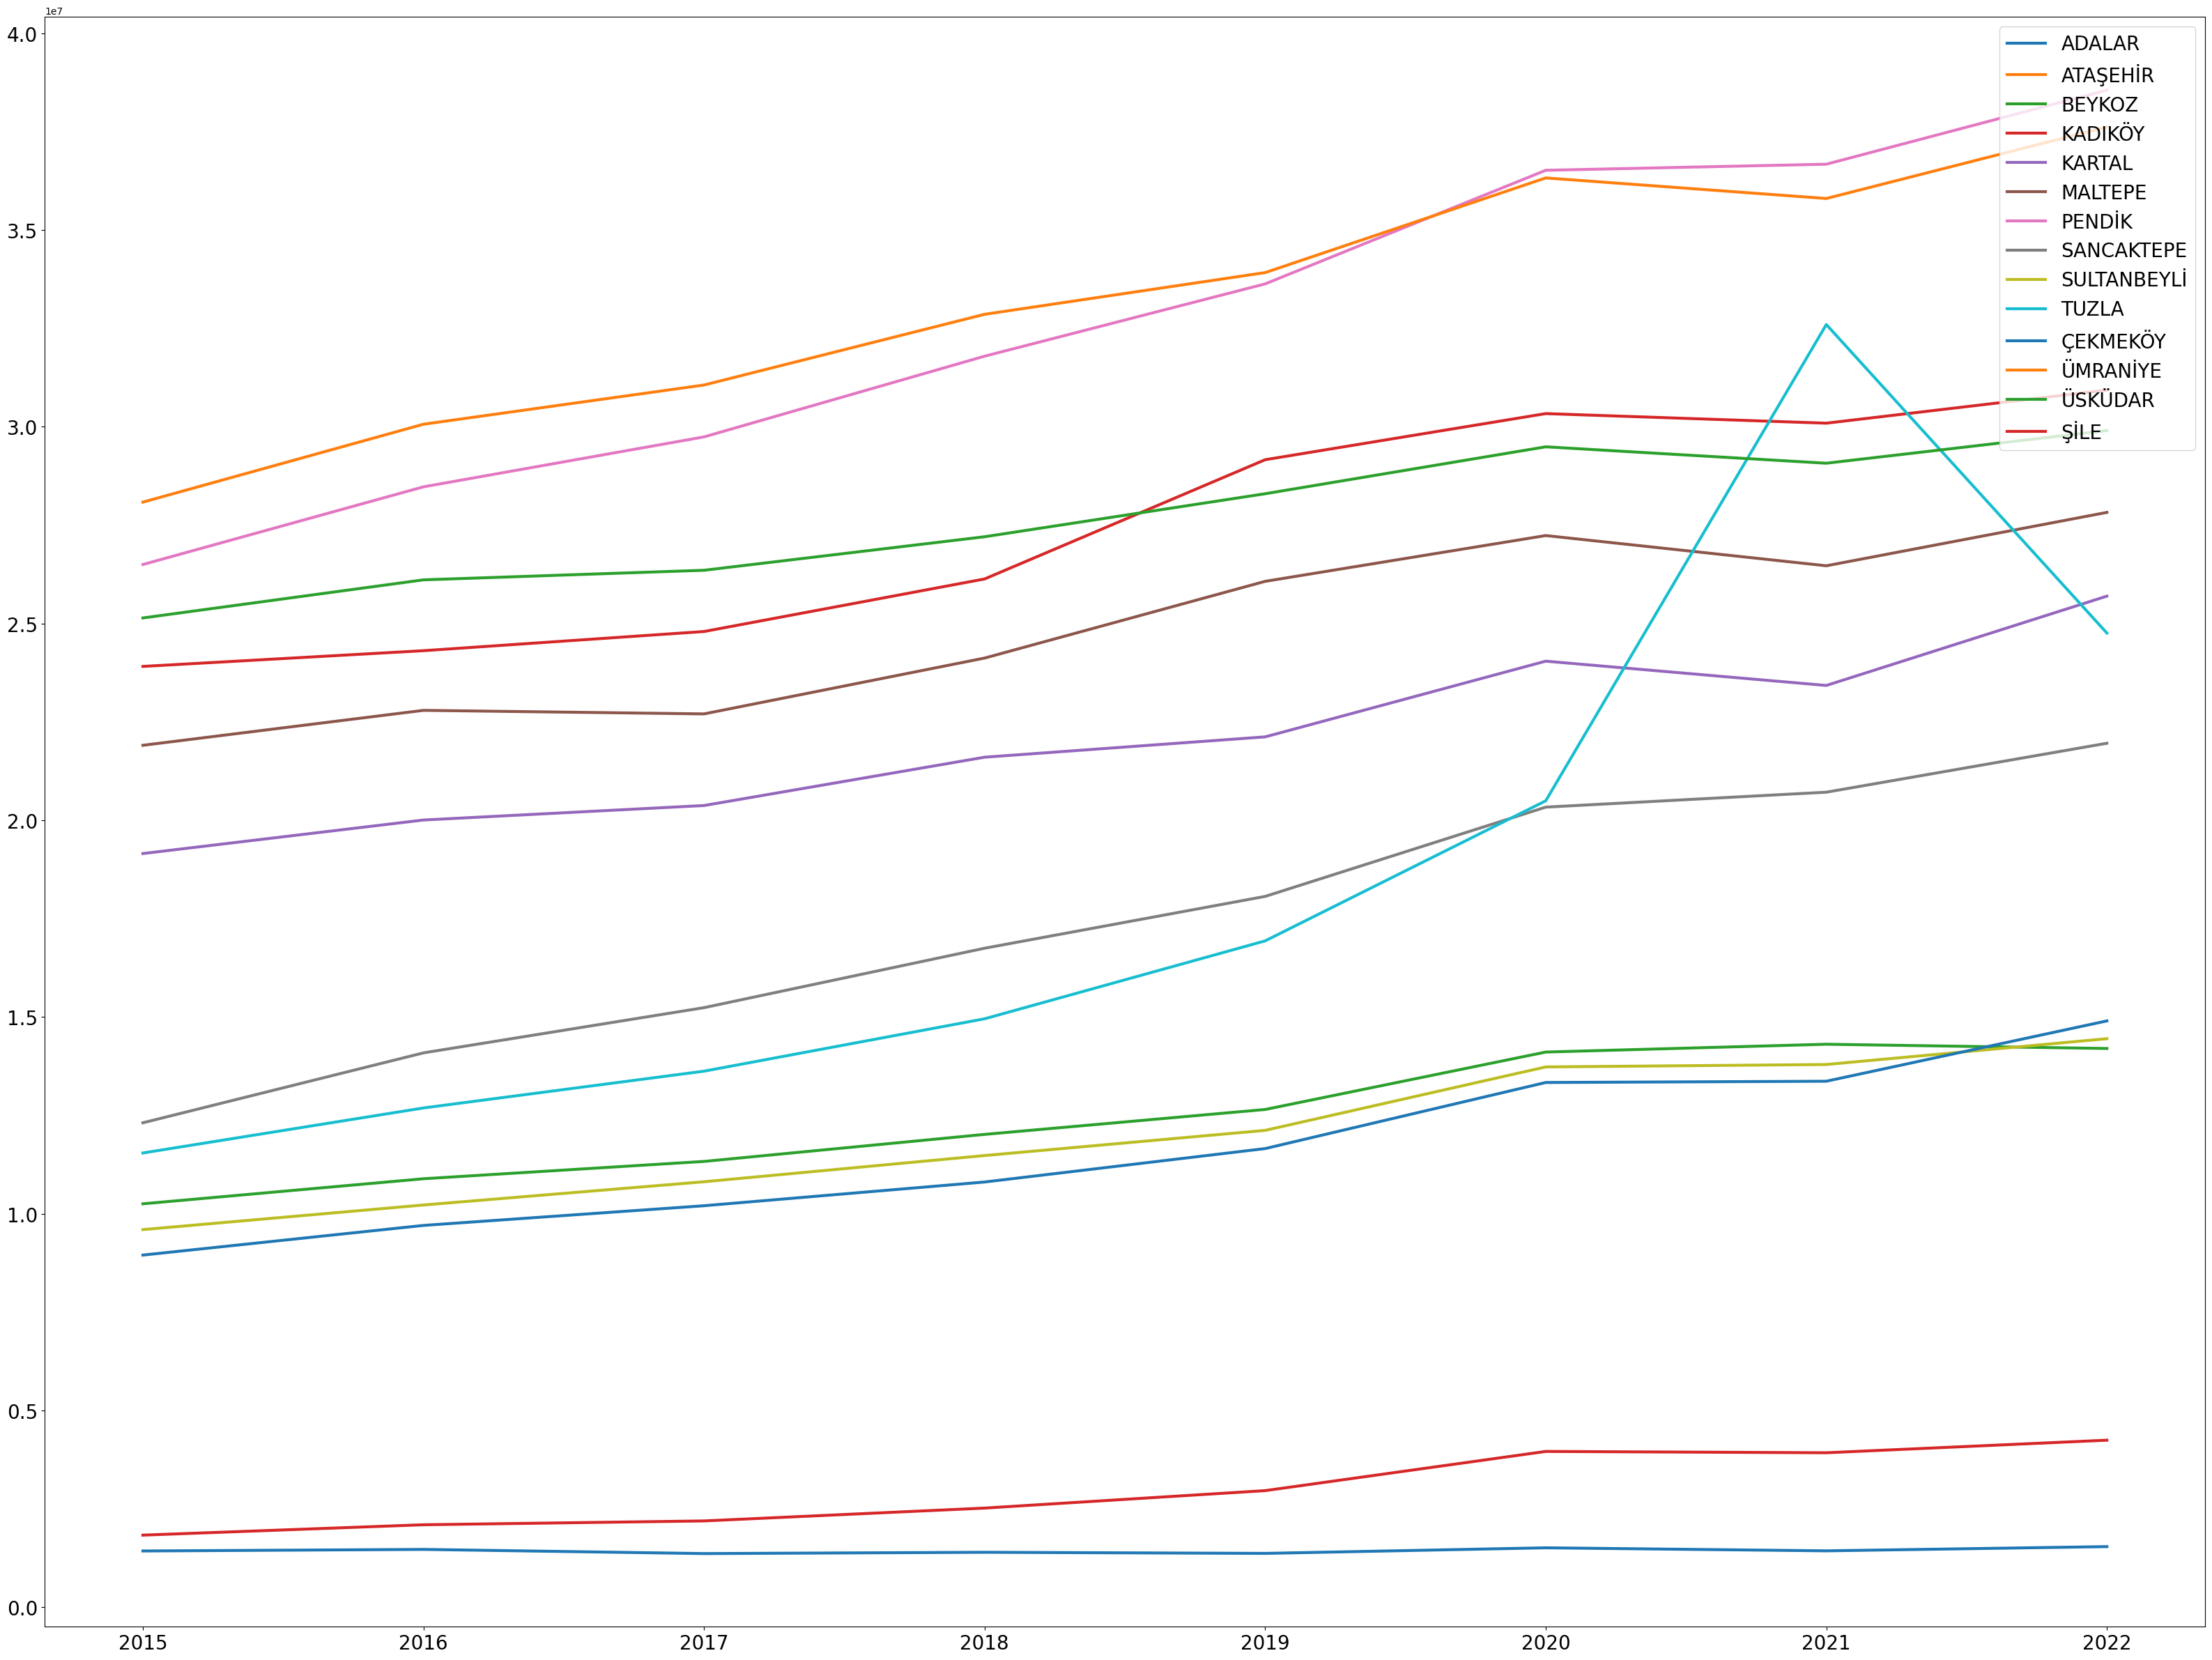

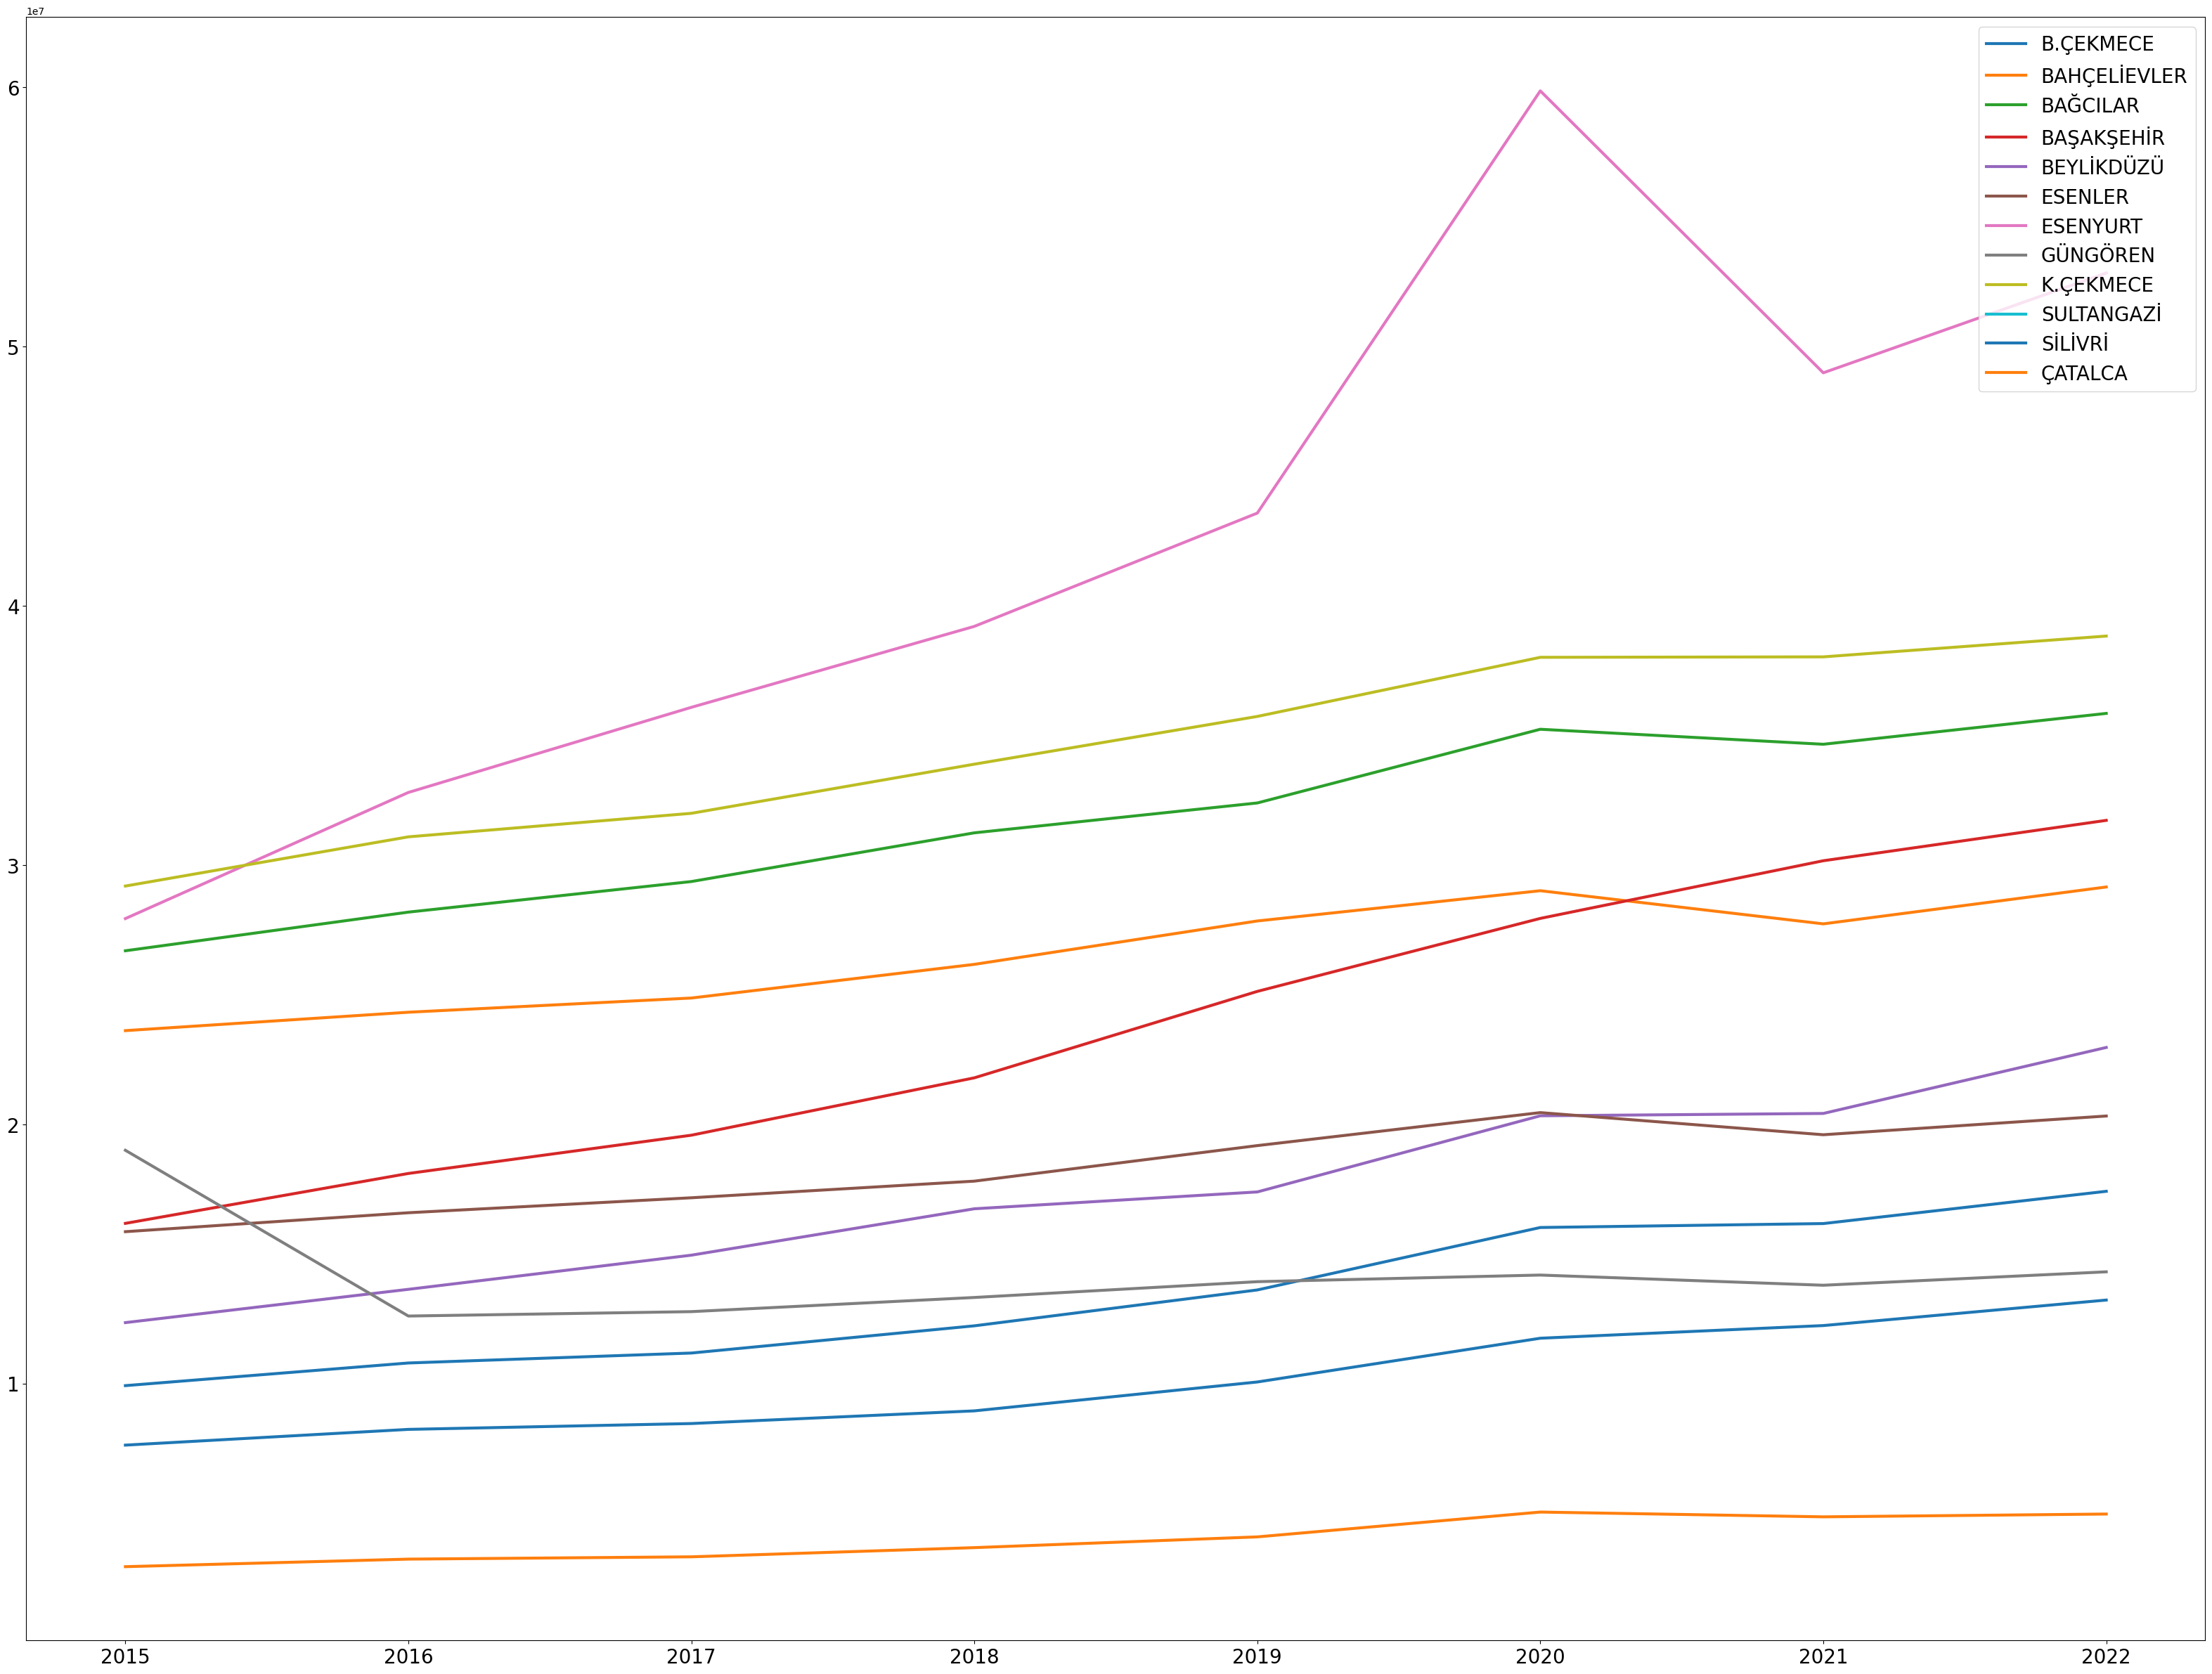

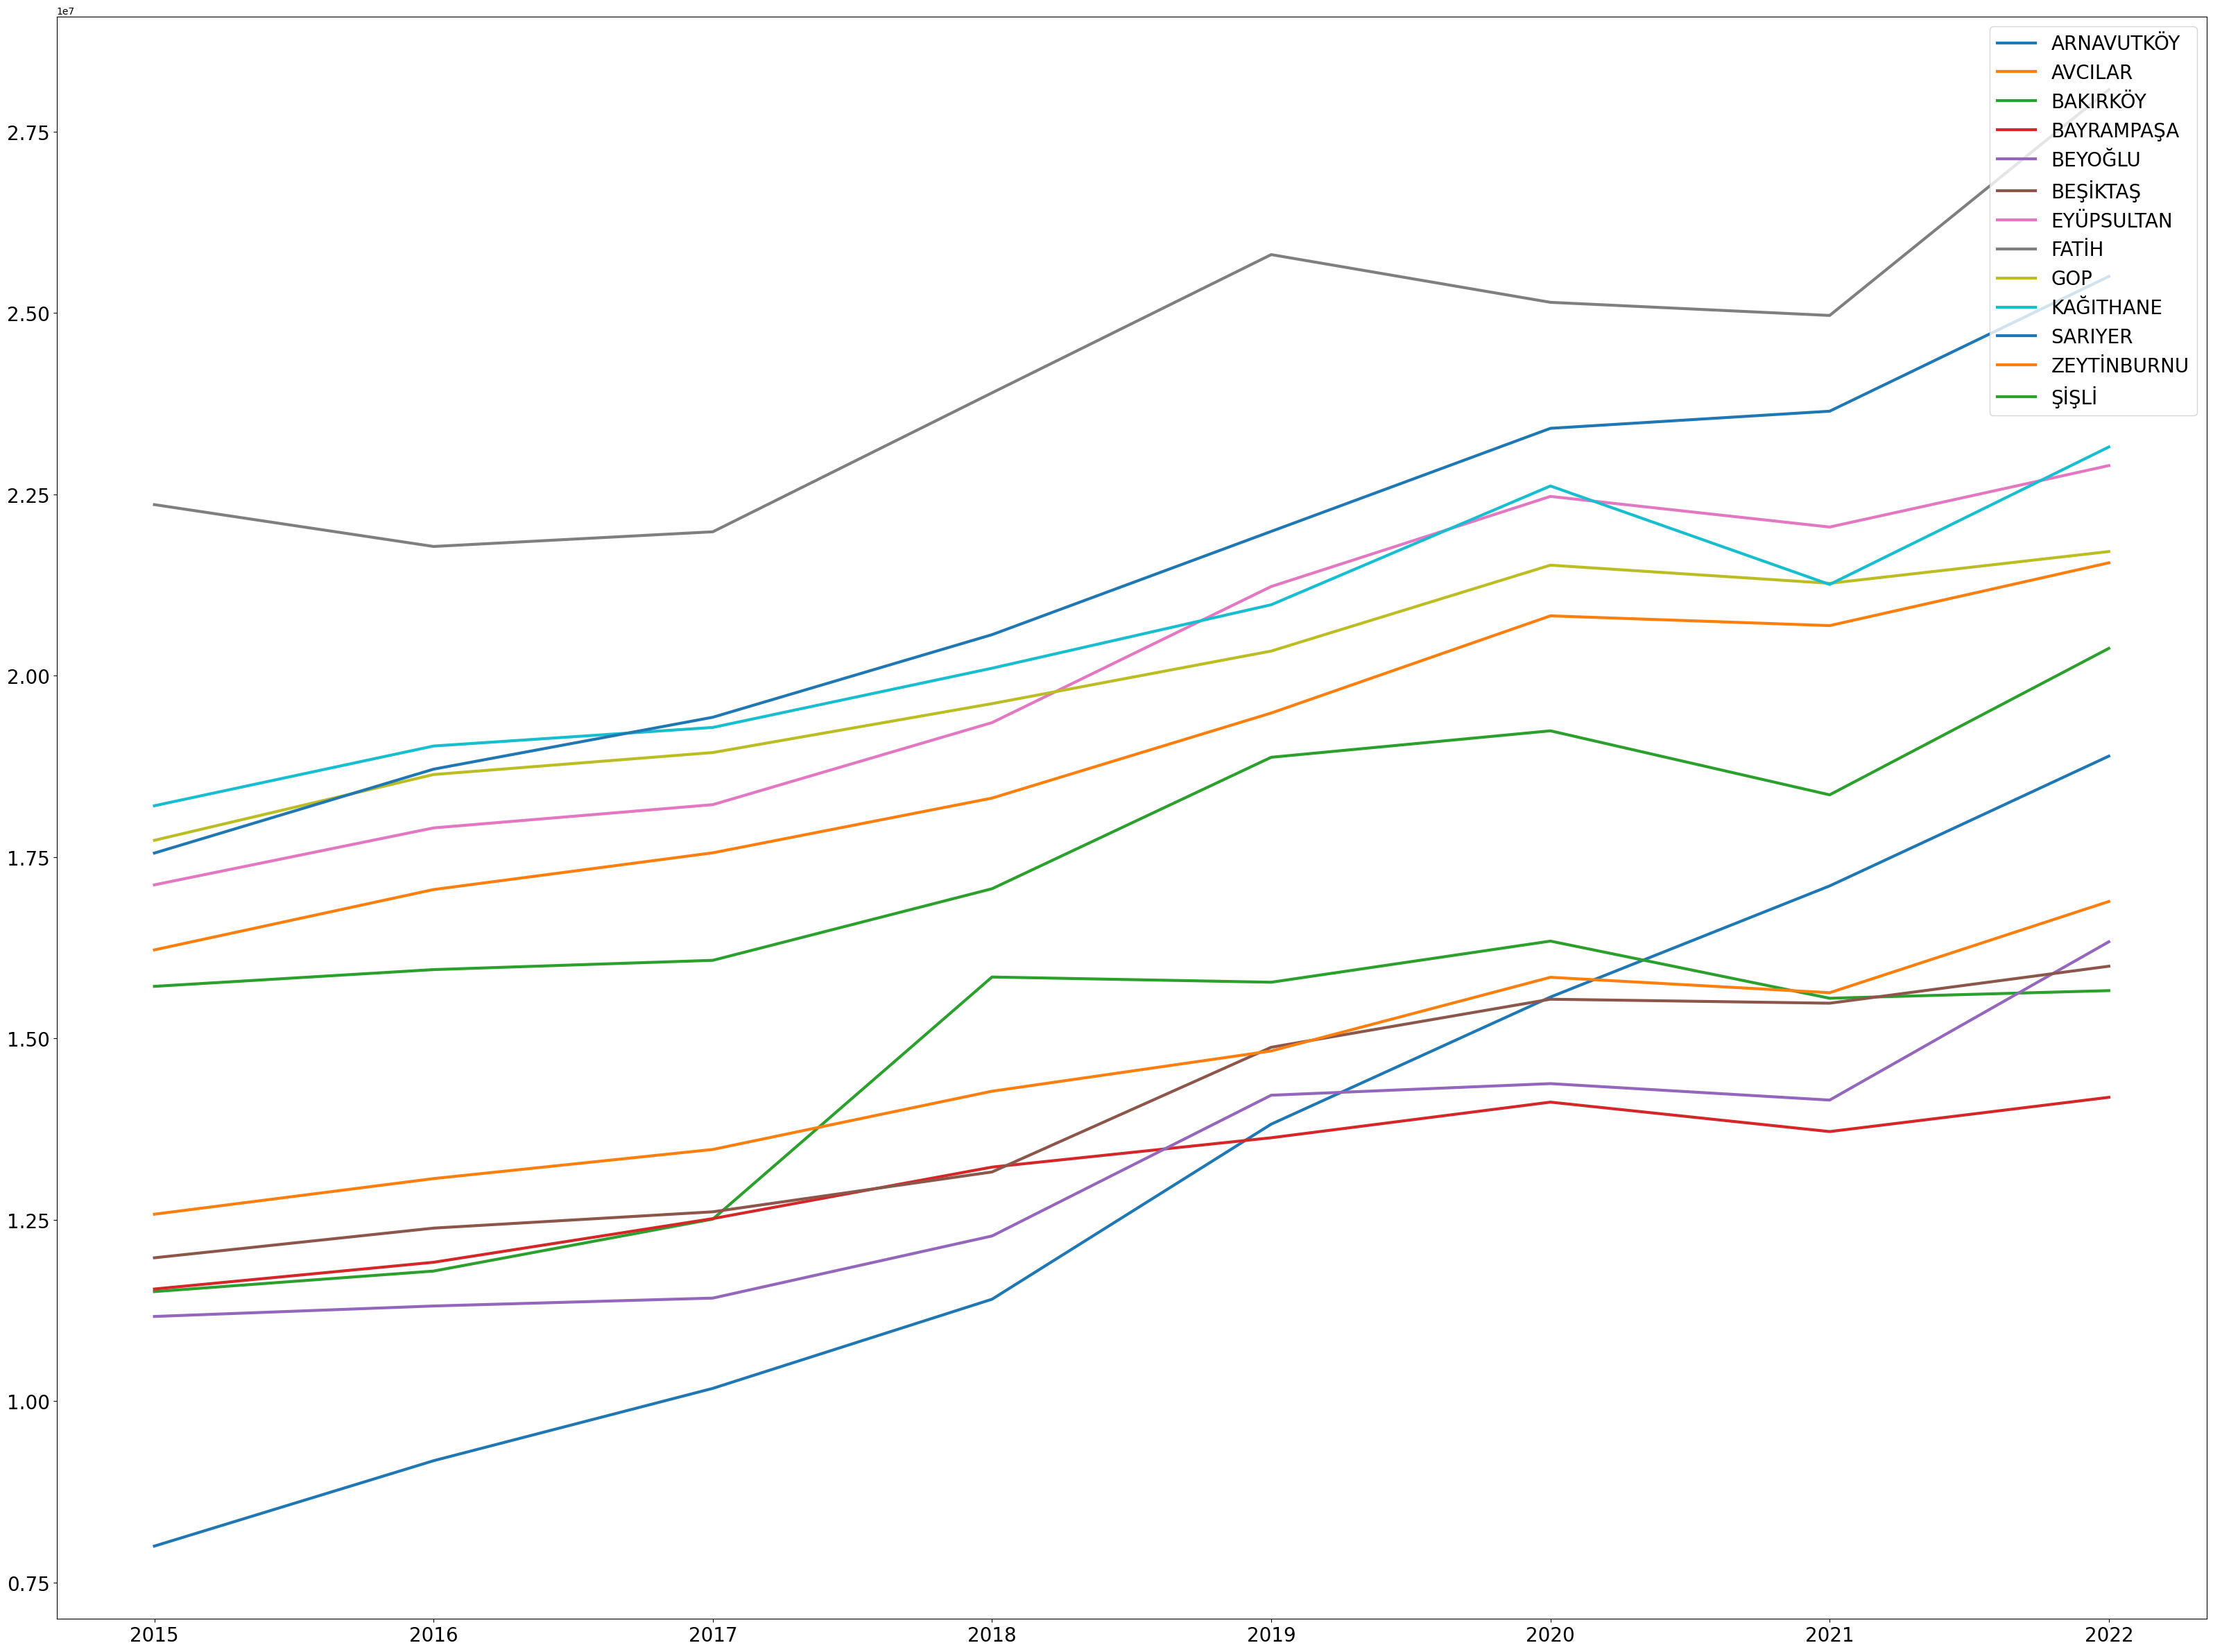

In [93]:
plt.figure(figsize=(40,30))
anadolu_data = ilcesel_su_data.loc[ilcesel_su_data["ilce"].isin(anadolu),:].copy()
avrupa1_data = ilcesel_su_data.loc[ilcesel_su_data["ilce"].isin(avrupa1),:].copy()
avrupa2_data = ilcesel_su_data.loc[ilcesel_su_data["ilce"].isin(avrupa2),:].copy()
for ilce in anadolu:
    plt.plot(anadolu_data.loc[anadolu_data["ilce"] == ilce,"yil"].values, anadolu_data.loc[anadolu_data["ilce"] == ilce,"tuketim_m3"].values, label=ilce, linewidth=3)
plt.xticks(fontsize="20")
plt.yticks(fontsize="20")
plt.legend(fontsize="20", loc ="upper right")
plt.show()

plt.figure(figsize=(40,30))
for ilce in avrupa1:
    plt.plot(avrupa1_data.loc[avrupa1_data["ilce"] == ilce,"yil"].values, avrupa1_data.loc[avrupa1_data["ilce"] == ilce,"tuketim_m3"].values, label=ilce, linewidth=3)
plt.xticks(fontsize="20")
plt.yticks(fontsize="20")
plt.legend(fontsize="20", loc ="upper right")
plt.show()

plt.figure(figsize=(40,30))
for ilce in avrupa2:
    plt.plot(avrupa2_data.loc[avrupa2_data["ilce"] == ilce,"yil"].values, avrupa2_data.loc[avrupa2_data["ilce"] == ilce,"tuketim_m3"].values, label=ilce, linewidth=3)
plt.xticks(fontsize="20")
plt.yticks(fontsize="20")
plt.legend(fontsize="20", loc ="upper right")
plt.show()